In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Завантаження даних

In [189]:
df = pd.read_excel('data\\data_lab1.xlsx', sheet_name='2,18', index_col=0)

df.dropna(inplace=True)

df

,t36,t35,t34,t33,t32
Диурез,,,,,
1,50,50,60,80,130
2,45,45,60,85,150
3,45,45,60,80,150
4,50,50,55,90,200
5,50,50,55,85,110
6,50,40,60,85,120
7,45,50,55,80,120
8,45,50,55,90,130
9,50,55,60,85,150


In [190]:
data = df.copy()
#вибір ознак
data = data[['t36','t35','t34','t33','t32']]
#стандартизація даних
X_st = (data - data.mean()) / data.std(ddof=1)
data

,t36,t35,t34,t33,t32
Диурез,,,,,
1,50,50,60,80,130
2,45,45,60,85,150
3,45,45,60,80,150
4,50,50,55,90,200
5,50,50,55,85,110
6,50,40,60,85,120
7,45,50,55,80,120
8,45,50,55,90,130
9,50,55,60,85,150


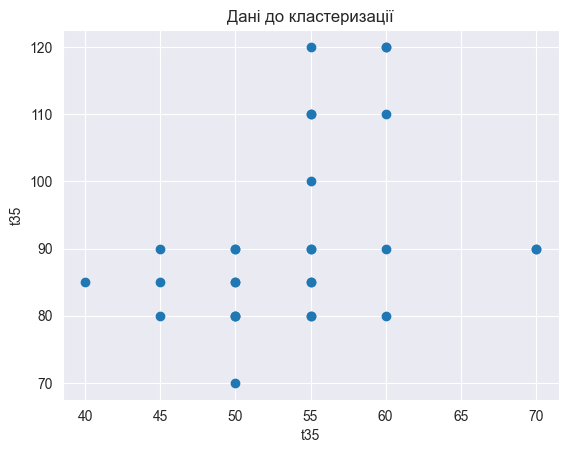

<Axes: >

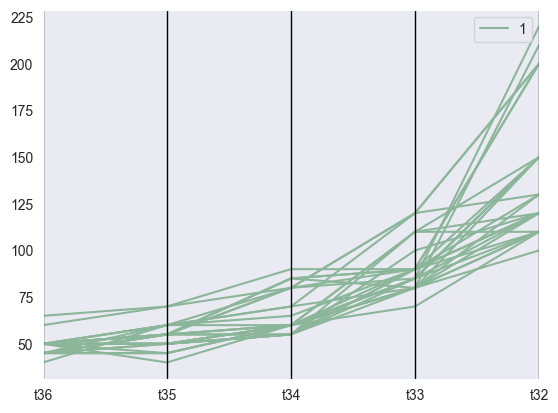

In [191]:
df['y_kmeans'] = 1
# Візуалізація даних до кластеризації
plt.scatter(df["t35"],df["t33"], label='До кластеризації')
plt.xlabel('t35')
plt.ylabel('t35')
plt.title('Дані до кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns)

In [192]:
# кластеризація  даних  методом k-середніх  на  задану  користувачем  кількість кластерів
kmeans = KMeans(n_clusters=2, init="random", n_init=10)
kmeans.fit(data)
df['y_kmeans'] = kmeans.labels_
print(kmeans.labels_)

[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]


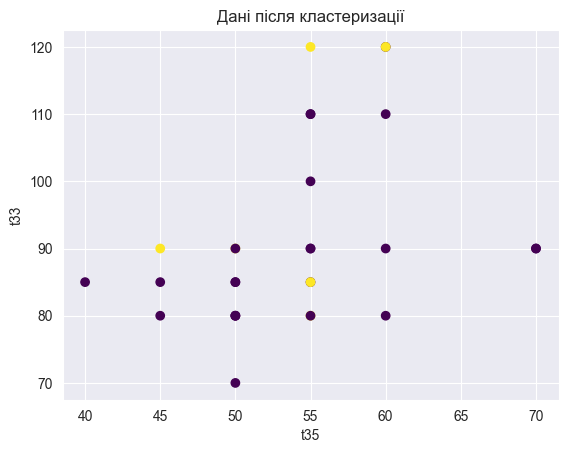

<Axes: >

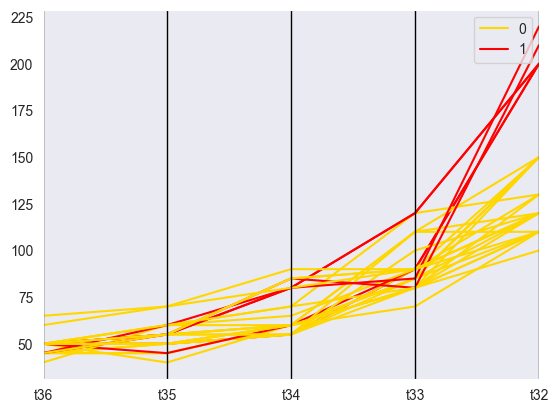

In [193]:

# Візуалізація даних після кластеризації
plt.scatter(df["t35"],df["t33"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t35')
plt.ylabel('t33')
plt.title('Дані після кластеризації')
plt.show()

colors = ('gold', 'red', 'blue', 'green','hotpink')
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

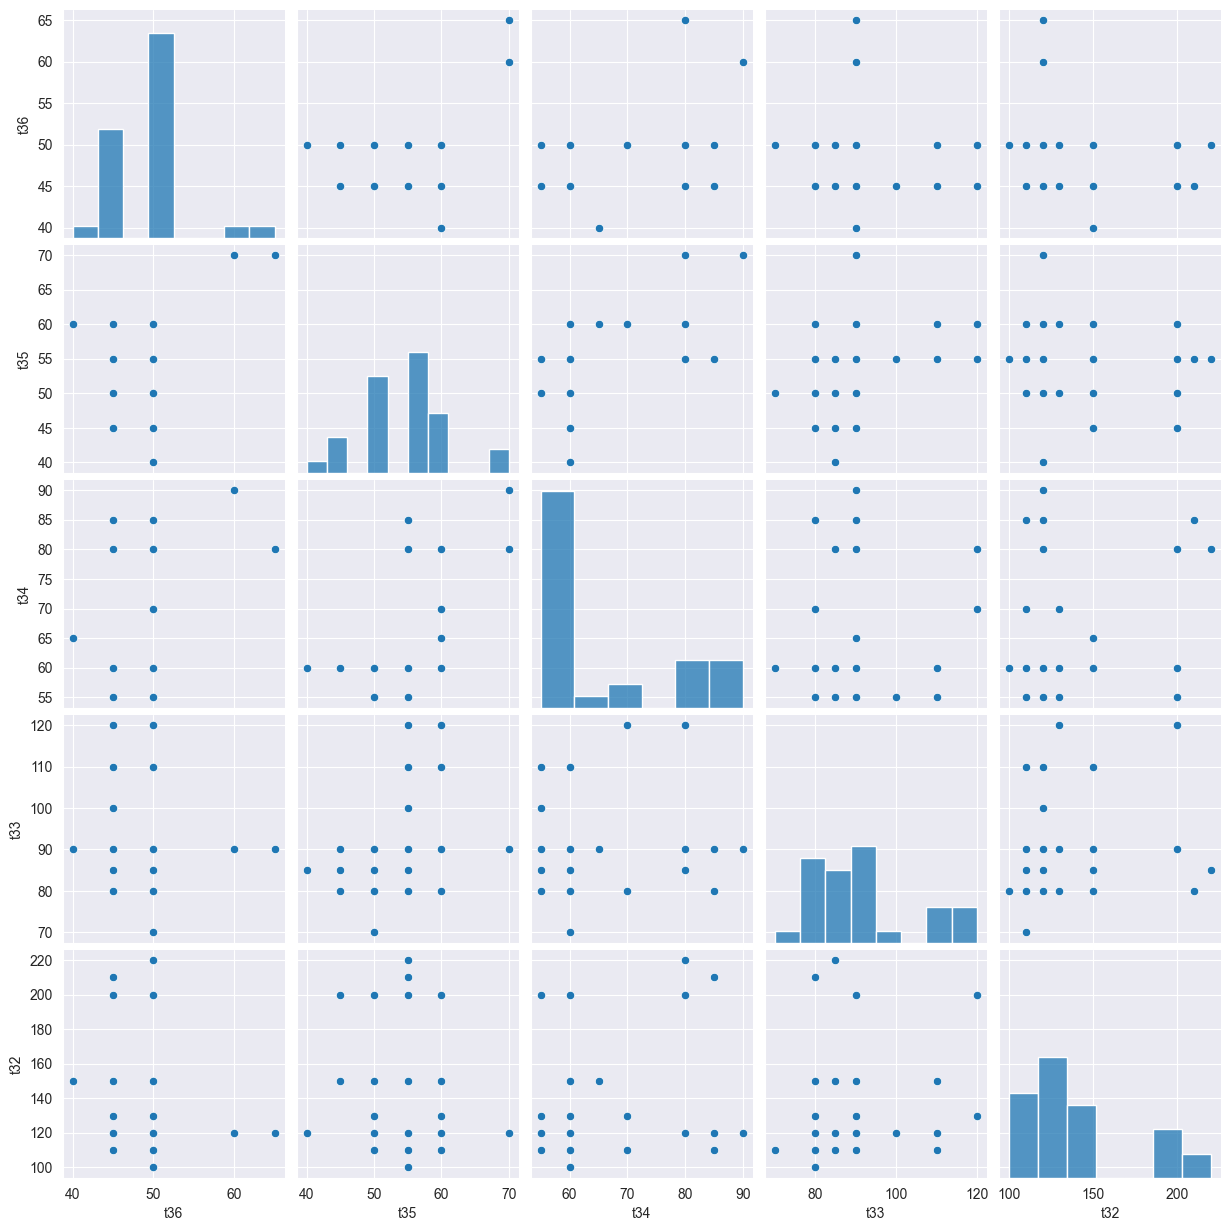

In [194]:
sns.pairplot(data)

In [195]:
# sns.pairplot(df, hue='y_kmeans', vars=X.columns, palette=dict(zip(df['y_kmeans'].unique(), colors[:df['y_kmeans'].nunique()])))

## Оцінювання  оптимальної  кількості  кластерів  на  основі  одного  з  індексів  якості кластеризації;  результати  оцінювання  подати  у  табличному  та  графічному вигляді; 

### Індекс Калінскі-Харабас

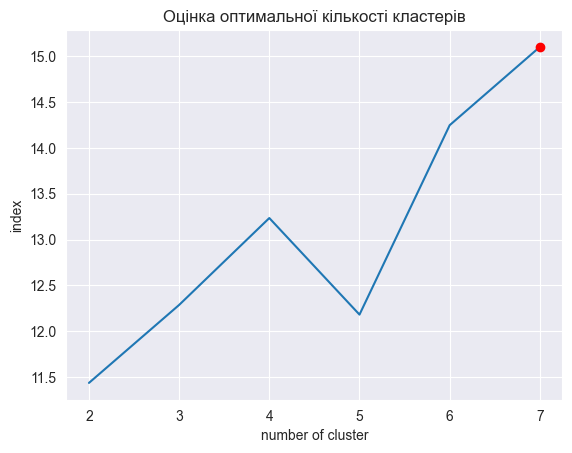

In [196]:
indices = []
k_range = range(2, 8)
for k in k_range:
    cluster_labels  = KMeans(n_clusters=k, n_init=10).fit_predict(X_st)
    indices.append(calinski_harabasz_score(X_st,cluster_labels ))
plt.plot(k_range,indices)
arg = np.argmax(indices)
plt.plot(k_range[arg], indices[arg], marker='o', color='red')
plt.xlabel('number of cluster')
plt.ylabel('index')
plt.title('Оцінка оптимальної кількості кластерів')

optimal_num_clusters = k_range[np.argmax(indices)]


In [197]:
# Запуск k-середніх з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10)
kmeans.fit(data)
df['y_kmeans'] = kmeans.labels_


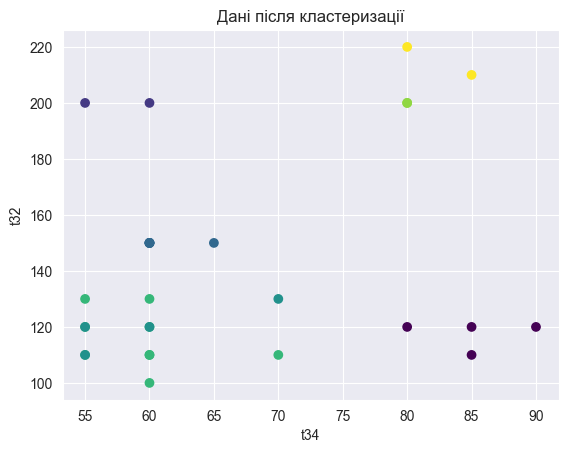

<Axes: >

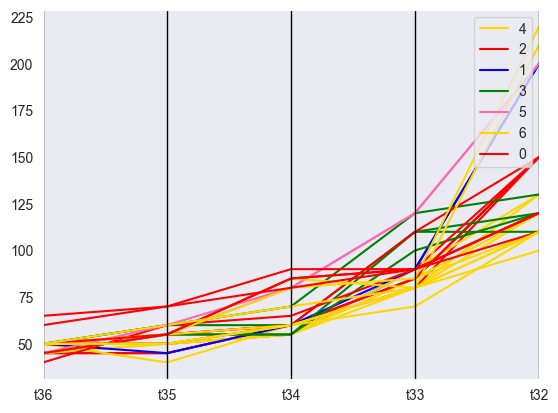

In [198]:
# Візуалізація даних після кластеризації
plt.scatter(df["t34"],df["t32"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t34')
plt.ylabel('t32')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

### Індекс Девіс-Болдуін

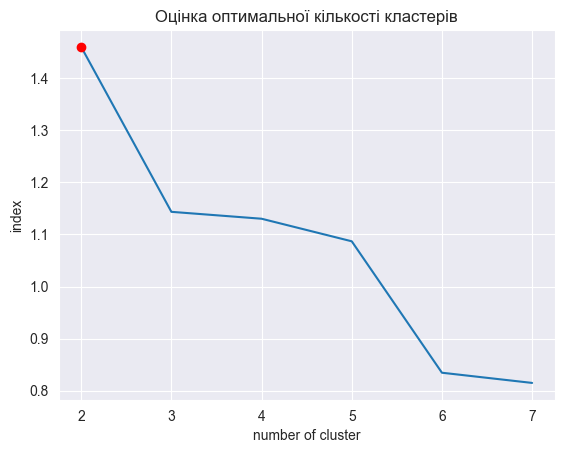

In [199]:
indices = []
k_range = range(2, 8)
for k in k_range:
    cluster_labels  = KMeans(n_clusters=k, n_init=10).fit_predict(X_st)
    indices.append(davies_bouldin_score(X_st,cluster_labels ))
plt.plot(k_range,indices)
arg = np.argmax(indices)
plt.plot(k_range[arg], indices[arg], marker='o', color='red')
plt.xlabel('number of cluster')
plt.ylabel('index')
plt.title('Оцінка оптимальної кількості кластерів')

optimal_num_clusters = k_range[np.argmax(indices)]

In [200]:
# Запуск k-середніх з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10)
kmeans.fit(data)
df['y_kmeans'] = kmeans.labels_

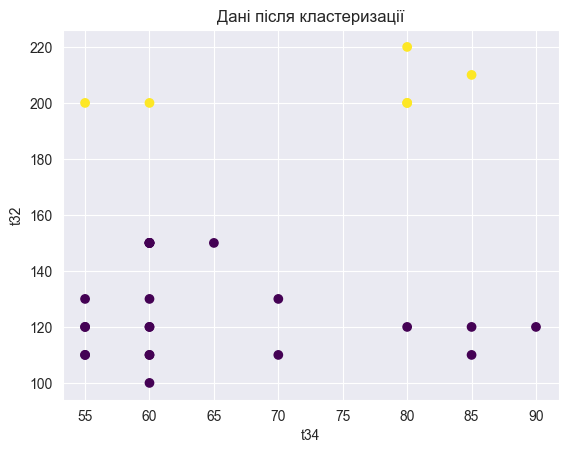

<Axes: >

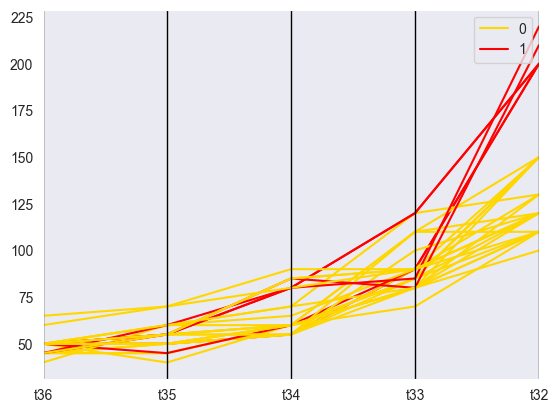

In [201]:
# Візуалізація даних після кластеризації
plt.scatter(df["t34"],df["t32"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t34')
plt.ylabel('t32')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)

## Розрахунок середнього арифметичного та середньоквадратичного відхилення для кожного виділеного кластеру. 

In [202]:
cluster_stats = df.groupby('y_kmeans').agg({'t36': ['mean', 'std'],
                                             't35': ['mean', 'std'],
                                             't34': ['mean', 'std'],
                                             't33': ['mean', 'std'],
                                             't32': ['mean', 'std']})

print(cluster_stats)

                t36                  t35                  t34             \
               mean       std       mean       std       mean        std   
y_kmeans                                                                   
0         49.130435  5.146087  54.130435  7.175111  64.347826  10.585619   
1         48.333333  2.581989  53.333333  5.163978  73.333333  12.516656   

                t33                    t32             
               mean        std        mean        std  
y_kmeans                                               
0         89.782609  12.291743  125.652174  16.466519  
1         97.500000  17.818530  205.000000   8.366600  


## Власний метод k-середніх

In [203]:
def initialize_centers(X, n_clusters):
    # Ініціалізація початкових центрів за допомогою k-means++
    centers = [X[np.random.randint(X.shape[0])]]
    for _ in range(1, n_clusters):
        distances = np.linalg.norm(X - centers[-1], axis=1)
        probs = distances / np.sum(distances)
        new_center = X[np.random.choice(X.shape[0], p=probs)]
        centers.append(new_center)
    return np.array(centers)

def assign_points_to_clusters(X, centers):
    # Призначення точок до кластерів
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centers(X, labels, n_clusters):
    # Оновлення центрів кластерів
    new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    return new_centers

def calculate_inertia(X, centers, labels):
    # Розрахунок інерції
    inertia = np.sum((X - centers[labels]) ** 2)
    return inertia


def my_kmeans(X, n_clusters, n_init=10, max_iters=100):
    best_centers = None
    best_labels = None
    best_inertia = float('inf')
    
    for _ in range(n_init):
        # Ініціалізація початкових центрів за допомогою k-means++
        centers = initialize_centers(X, n_clusters)
        labels = None
        
        for _ in range(max_iters):
            
            # Призначення точок до кластерів
            labels = assign_points_to_clusters(X, centers)
            
            # Оновлення центрів
            new_centers = update_centers(X, labels, n_clusters)
            
            # Перевірка на збіжність
            if np.all(new_centers == centers):
                break
            
            centers = new_centers
        
        # Розрахунок інерції (сума квадратів відстаней до центрів)
        inertia = calculate_inertia(X, centers, labels)
        
        # Порівняння з найкращим результатом
        if inertia < best_inertia:
            best_centers = centers
            best_labels = labels
            best_inertia = inertia
    
    return best_centers, best_labels, best_inertia



[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]


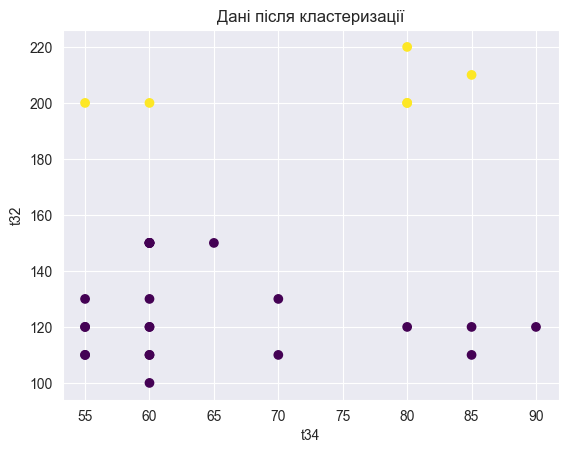

<Axes: >

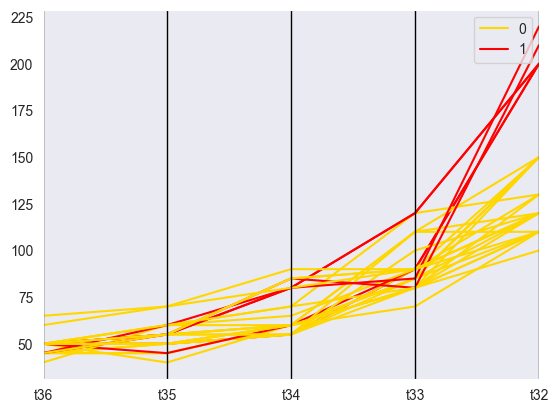

In [204]:

best_centers, best_labels, best_inertia = my_kmeans(data.values, 2)
print(best_labels)
df['y_kmeans'] = best_labels

# Візуалізація даних після кластеризації
plt.scatter(df["t34"],df["t32"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t34')
plt.ylabel('t32')
plt.title('Дані після кластеризації')
plt.show()

pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=data.columns, color=colors)